# Global mean Sea Surface Temperatures

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import math

from matplotlib.dates import DateFormatter

from dask.distributed import Client
from dask import delayed
import dask

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pyproj

plt.rcParams['figure.figsize'] = (10, 4)

In [3]:
from globales import *

>>>>>---------------------------------------------------------------------------<<<<<
    > Linux rossby 6.8.0-59-generic #61-Ubuntu SMP PREEMPT_DYNAMIC Fri Apr 11 23
    >
    > home    - /home/pvb
    > ProPath - /home/pvb/Proyectos
    > AnaPath - /home/pvb/Analisis
    > DatPath - /data/pvb
    > ArgoDta - /data/pvb/Argo
>>>>>---------------------------------------------------------------------------<<<<<


## Load data

In [4]:
Xr=[-9.7299+360,  -15.2693+360,  -16.0000+360, -17.7162+360];
Yr=[32.1623,   24.8980,   29.7545,  18.9396];
Tr=['UP1','UP2','OCE','DWN']

Cr=['b','b','r','r']


In [8]:
TituloFigura='Titulo'
Ymin=17
Ymax=26

0
1
2
3


(17.0, 26.0)

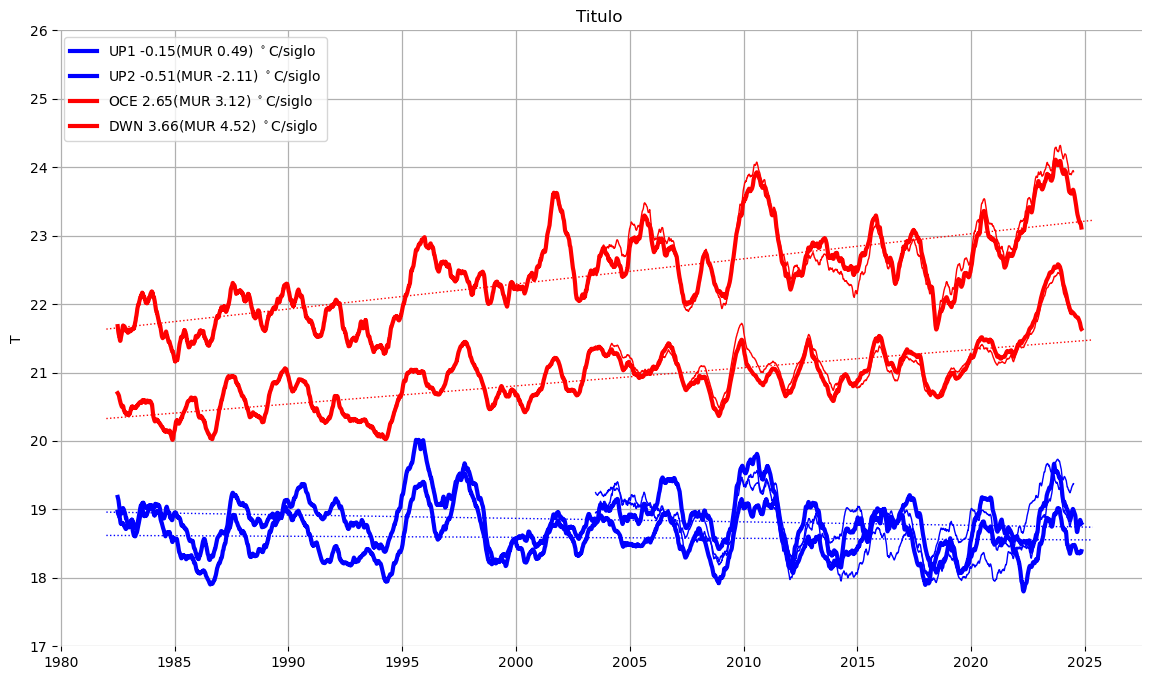

In [9]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))

for i1 in range(0,4):
    print(i1)
    sst=xr.open_dataset("./data2/sstd.{0:3s}.nc".format(Tr[i1])).sst
    sst_fil = sst.rolling(time = 365 , center = True).mean()

    sstMUR=xr.open_dataset("./data2/sstd.MUR.{0:03s}.nc".format(Tr[i1])).analysed_sst-273.15
    sstMUR_fil = sstMUR.rolling(time = 365 , center = True).mean()

    #Linear fit
    ind = np.isfinite(sst)
    z = np.polyfit(sst.time.astype(np.int64)[ind],sst[ind], 1)
    sst_linearf = z[0] * sst.time.astype(np.int64) + z[1]
    Dslope=z[0]/1.e-9*24*3600*365*100 #paso a C por siglo


    #Linear fit
    ind = np.isfinite(sstMUR)
    z = np.polyfit(sstMUR.time.astype(np.int64)[ind],sstMUR[ind], 1)
    sstMUR_linearf = z[0] * sstMUR.time.astype(np.int64) + z[1]
    DslopeMUR=z[0]/1.e-9*24*3600*365*100 #paso a C por siglo

   
    tTendencia =  Tr[i1]+" " + "%2.2f"%(Dslope) +  "(MUR %2.2f)"%(DslopeMUR) + " $^\circ$C/siglo"

    ax.plot(sst_fil.time, sst_fil,    Cr[i1], label=tTendencia , linewidth = '3')
    ax.plot(sst.time,     sst_linearf,Cr[i1]+':', linewidth=1);
    
    ax.plot(sstMUR_fil.time, sstMUR_fil,    Cr[i1], linewidth = '1')
    #ax.plot(sstMUR.time,     sstMUR_linearf,Cr[i1]+':', linewidth=1);
       
    
    
ax.legend(loc = 2)

ax.set_title(TituloFigura);
ax.grid(linestyle='-', linewidth=.9)
ax.set_ylabel('T')
#ax.set_xlabel(Xlabel)
ax.set_frame_on(False)
ax.set_ylim(Ymin,Ymax)

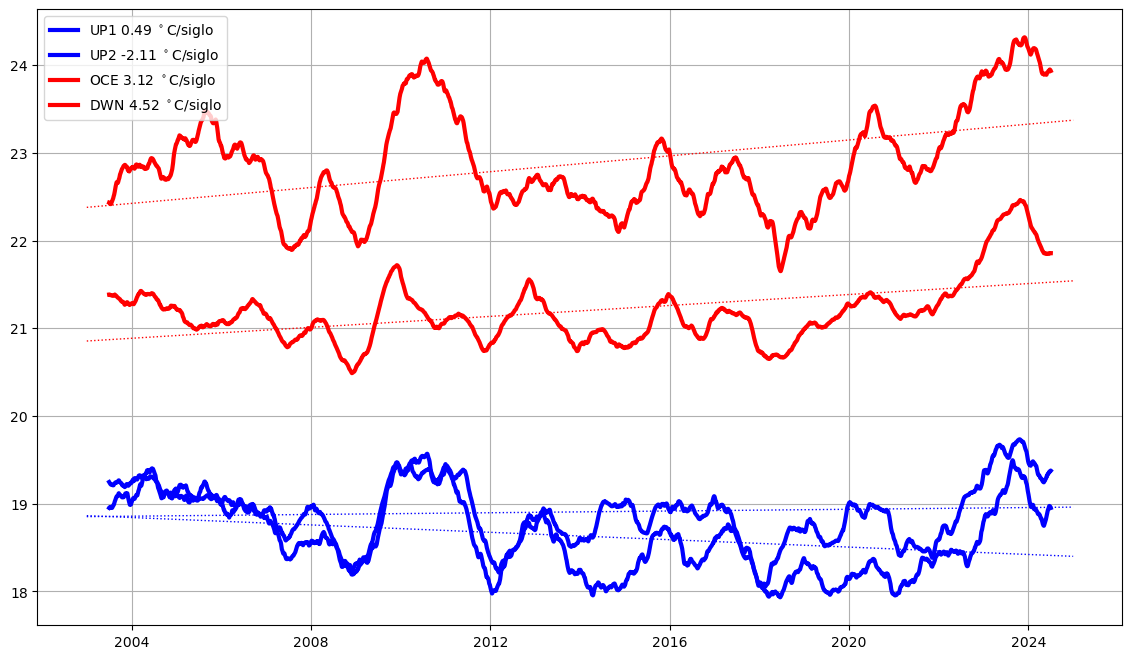

In [21]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))

for i1 in range(0,4):
    sstMUR=xr.open_dataset("./data2/sstd.MUR.{0:03s}.nc".format(Tr[i1])).analysed_sst-273.15
    sstMUR_fil = sstMUR.rolling(time = 365 , center = True).mean()

    #Linear fit
    ind = np.isfinite(sstMUR)
    z = np.polyfit(sstMUR.time.astype(np.int64)[ind],sstMUR[ind], 1)
    sstMUR_linearf = z[0] * sstMUR.time.astype(np.int64) + z[1]
    DslopeMUR=z[0]/1.e-9*24*3600*365*100 #paso a C por siglo

    tTendencia =  Tr[i1]+" " + "%2.2f"%(DslopeMUR) + " $^\circ$C/siglo"
    
    ax.plot(sstMUR_fil.time, sstMUR_fil,    Cr[i1], label=tTendencia , linewidth = '3')
    ax.plot(sstMUR.time,     sstMUR_linearf,Cr[i1]+':', linewidth=1);

ax.legend(loc = 2)
ax.grid()


In [94]:
sst=xr.open_dataset("./data2/sstd.MUR.{0:02d}.nc".format(i1)).analysed_sst-273.15

In [101]:
sst.time[0]

<xarray.DataArray 'time' ()> Size: 8B
array('2003-01-01T09:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2003-01-01T09:00:00
    lat      float32 4B ...
    lon      float32 4B ...